Критерии, гипотезы


In [19]:
# Библиотеки. Начальные условия

import numpy as np
import math
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


alpha = 0.1
a0 = 3.0
##H_2 := alpha > a0

sigma0 = 2.1
##H_3 := sigma > sigma0

a1 = 3.5
##H_1 := alpha1 = 3.5

sigma1 = 2.2
eps = 0.1
n = 100


data = [
    [-3.442, 1.295, 3.672,  2.354, 5.238, 1.136, 4.421, 2.071,  0.269,  0.894],
    [8.202,  0.605, -2.011, 3.375, 3.767, 1.068, 2.928, -0.276, 4.924,  3.310],
    [5.741,  6.951, 3.417,  2.991, 5.599, 4.896, 9.197, 3.823,  1.827,  5.389],
    [2.504,  4.212, -2.021, 1.891, 3.689, 5.366, 3.117, 4.641,  2.968,  4.645],
    [3.752,  4.582, 3.601,  0.934, 2.785, 3.294, 4.695, 1.092,  3.155,  4.352],
    [0.896,  0.839, 4.309,  2.793, 7.233, 0.95,  5.228, 1.28,   5.19,   0.972],
    [4.562,  1.915, 4.243,  4.495, 0.648, 5.34,  3.294, 2.791,  6.805,  3.474],
    [3.044,  5.452, 2.957,  7.862, 4.61,  1.317, 5.383, 3.205,  -1.022, 3.602],
    [3.373,  5.415, 4.093,  5.407, 0.501, 2.135, 1.957, 0.826,  5.34,   3.759],
    [1.735, -3.277, 5.101,  1.43,  3.494, 0.545, 4.699, 3.44,   2.85,   4.330]
]
data = np.array(data, float)


def arrN(X, a, sigma):
    arr = []
    for x in X:
        arr.append(sps.norm.pdf(x, a, sigma))
    return arr



In [20]:
# Анализ выборки

print("Выборка =\n", data)

print("\nНаходим крайние члены вариационного ряда и размах выборки")
max = np.amax(data)
min = np.amin(data)
print("Крайние члены вариационного ряда:\nmax = ", max, "min = ", min)
w = max - min
print("Размах выборки:\nw = ", w)
n = np.size(data)
l = math.trunc(1 + math.log2(n))
h = w / l
print("Размер выборки n = ", n, "\nЧисло интервалов l =", l, "\nШирина интервалов h = ", h)

int = []
for i in range(l + 1):
    int.append(round(min + i * h, 4))
print("Границы интервалов группировки int = ",  int)
v, binEdges  = np.histogram(data,l)
print("Частоты v = ", v)
p = v / n
print("Относительные частоты p = ", np.around(p,4))
pl = []
for i in p:
    pl.append(round(i / h, 4))
print("Вектор плотности относительной частоты pl = ", pl)


Выборка =
 [[-3.442  1.295  3.672  2.354  5.238  1.136  4.421  2.071  0.269  0.894]
 [ 8.202  0.605 -2.011  3.375  3.767  1.068  2.928 -0.276  4.924  3.31 ]
 [ 5.741  6.951  3.417  2.991  5.599  4.896  9.197  3.823  1.827  5.389]
 [ 2.504  4.212 -2.021  1.891  3.689  5.366  3.117  4.641  2.968  4.645]
 [ 3.752  4.582  3.601  0.934  2.785  3.294  4.695  1.092  3.155  4.352]
 [ 0.896  0.839  4.309  2.793  7.233  0.95   5.228  1.28   5.19   0.972]
 [ 4.562  1.915  4.243  4.495  0.648  5.34   3.294  2.791  6.805  3.474]
 [ 3.044  5.452  2.957  7.862  4.61   1.317  5.383  3.205 -1.022  3.602]
 [ 3.373  5.415  4.093  5.407  0.501  2.135  1.957  0.826  5.34   3.759]
 [ 1.735 -3.277  5.101  1.43   3.494  0.545  4.699  3.44   2.85   4.33 ]]

Находим крайние члены вариационного ряда и размах выборки
Крайние члены вариационного ряда:
max =  9.197 min =  -3.442
Размах выборки:
w =  12.639
Размер выборки n =  100 
Число интервалов l = 7 
Ширина интервалов h =  1.8055714285714284
Границы интервалов 

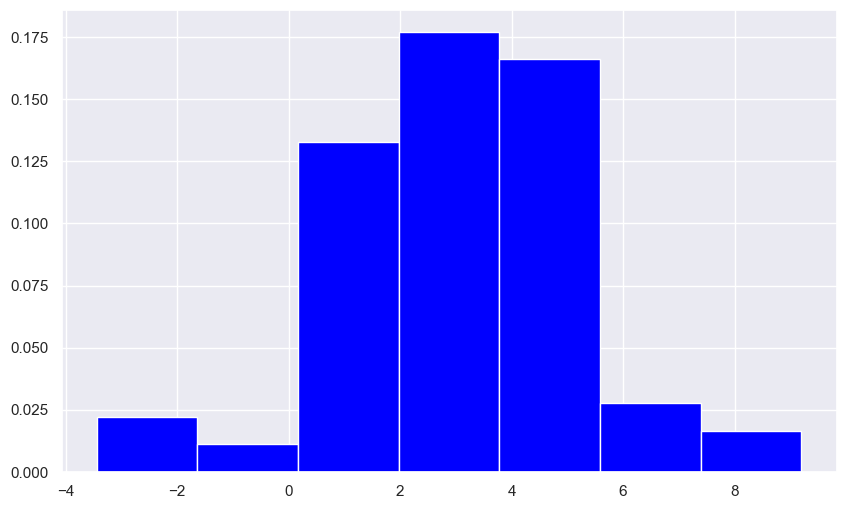

In [21]:
# Построение гистограммы


binEdgesAverage = np.zeros(binEdges[:l].size)
for i in range (l):
    binEdgesAverage[i] = (binEdges[i] + binEdges[i + 1]) / 2 

sns.set_theme()
plt.figure(figsize=(10,6))
x = binEdgesAverage
y = pl
plt.bar(x, y, width = h, color = "blue")
plt.show()

In [22]:
# Выборочные параметры

xm = 0
data.shape
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        xm += data[i, j]
xm /= n
print("Выборочное среднее xm = ", xm)

dev = 0
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        dev += (data[i, j] - xm) ** 2
dev /= (n - 1)
print("Выборочная дисперсия dev = ", dev)

Выборочное среднее xm =  3.177050000000001
Выборочная дисперсия dev =  5.143177522727274


Проверка Гипотез

In [23]:
# Критерий S2 (a > a0)

s2 = a0 + sps.t.ppf(1 - alpha, n - 1) * (math.sqrt(dev)) / (math.sqrt(n)) 
print("s2 = ",s2)
if xm > s2: 
    print("Отвергаем гипотезу H_0 в пользу гипотезы H_2")
else: 
    print("Принимаем гипотезу H_0")

s2 =  3.2925902269068135
Принимаем гипотезу H_0


In [24]:
# Критерий S3 (sigma > sigma0)

s3 = sigma0 ** 2 / (n - 1) * sps.chi2.ppf(1 - alpha, n - 1)
print("s3 = ",s3)
if (dev > s3):
    print("Отвергаем гипотезу H_01 в пользу гипотезы H_3")
else:
    print("Принимаем гипотезу H_01")
print()


s3 =  5.229942978320151
Принимаем гипотезу H_01



In [30]:
# Критерий s1 (a > a0)

# dev = 40.2
a0 = -1
# n = 36
# sigma1 = 1
# alpha = 0.01

s1 = a0 + sigma1 * sps.norm.ppf(1 - alpha) / np.sqrt(n)
print("s1 = %.5f" % s1)
if (dev <= s1):
    print("Отвергаем гипотезу H_0 в пользу гипотезы H_1")
else:
    print("Принимаем гипотезу H_0")
print()

beta = sps.norm.cdf((s1 - a1) / sigma1 * np.sqrt(n), 0, 1)
print("beta = %.5f" % beta, " - ошибка второго рода")

s1 = -0.71806
Принимаем гипотезу H_0

beta = 0.00000  - ошибка второго рода


In [26]:
# Значение a12 такое, что ошибка не превосходит 0.1

a12 = s1 - sps.norm.ppf(eps) * sigma1 / np.sqrt(n)
print("a12 = %.5f" % a12)

a12 = 3.56388


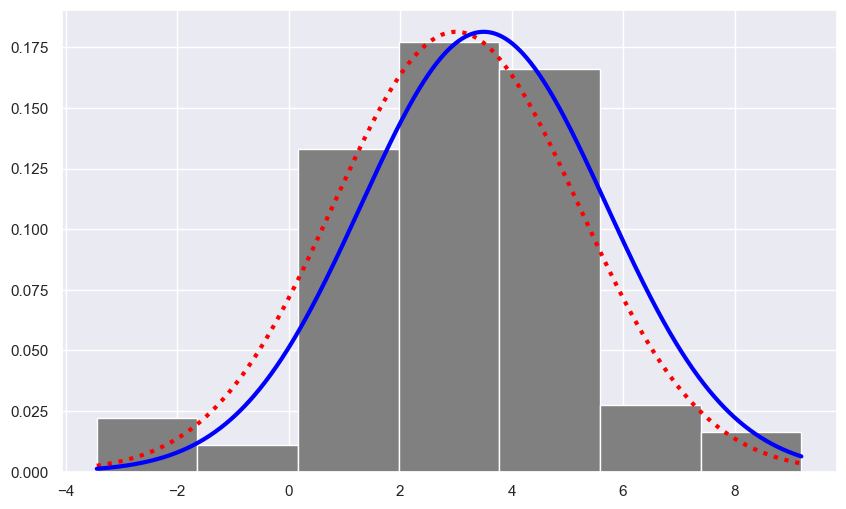

In [27]:
# График. Гистограмма с относительными частотами 


plt.figure(figsize=(10,6))
x = np.linspace(min, max, 1024)
plt.bar(binEdgesAverage, pl, width = h, color = "gray")
plt.plot(x, arrN(x, a0, sigma1), color = "red", linewidth = 3.0, linestyle = "dotted")
plt.plot(x, arrN(x, a1, sigma1), color = "blue", linewidth = 3.0)
plt.show()